# Welcome the our interactive Jupyter workshop


Today, we will simulate a data analysis workflow, which will allow us to play around with some of Jupyter's interactive aspects.

We will explore part of the **Gapminder** dataset using tools from two very popular R packages: **dplyr** and **ggplot2**. Enjoy!

## A few words about Gapminder


Gapminder Foundation is a non-profit venture registered in Stockholm, Sweden, that promotes sustainable global development and achievement of the **United Nations Millennium Development Goals** by increased use and understanding of statistics and other information about social, economic and environmental development at local, national and global levels.


<img src="https://www.adamvowles.co.uk/wp-content/uploads/2015/05/gapminder.png" width="500">

## Let's get started with some data exploration!

In [1]:

# First we load all necessary packages for this session from CRAN 

# Data analysis packages
library(dplyr)
library(ggplot2)

# The package containing our dataset
install.packages('gapminder')
library(gapminder)

Warning message:
"package 'dplyr' was built under R version 3.6.1"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.1"Installing package into 'C:/Users/Nathalie/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'gapminder' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Nathalie\AppData\Local\Temp\RtmpyUNBS5\downloaded_packages


Warning message:
"package 'gapminder' was built under R version 3.6.1"

**Well done!**  We will now take a dive into our dataset.

In [2]:
# This allows us to take a sneak peak of our dataset
head(gapminder)

# And here we are trying to find out more about the type of variables in gapminder
str(gapminder)

# How many entries dows our datset contain?
nrow(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


Classes 'tbl_df', 'tbl' and 'data.frame':	1704 obs. of  6 variables:
 $ country  : Factor w/ 142 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ continent: Factor w/ 5 levels "Africa","Americas",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ year     : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ lifeExp  : num  28.8 30.3 32 34 36.1 ...
 $ pop      : int  8425333 9240934 10267083 11537966 13079460 14880372 12881816 13867957 16317921 22227415 ...
 $ gdpPercap: num  779 821 853 836 740 ...


[1] 1704

In [3]:
# First we will group all our entries by country to reduce the number of rows

gapminder_mini = gapminder %>%
    filter(year == 1957) %>%
    group_by(country)


# Let's have a look at the number of entries in gapminder_mini
nrow(gapminder_mini)

# Check out the average life expectancy in 1957 by using the arithmetic mean - Note: The $ sign, helps us select a variable of interest.
mean(gapminder_mini$lifeExp)

# It's your turn, I will give your group another year to try out. We will then compare life expectancy and population size for that year!

[1] 142

[1] 51.5074

**Great work!**

## A quick loook at exploratory plotting!

We will explore change in population size over time by continent

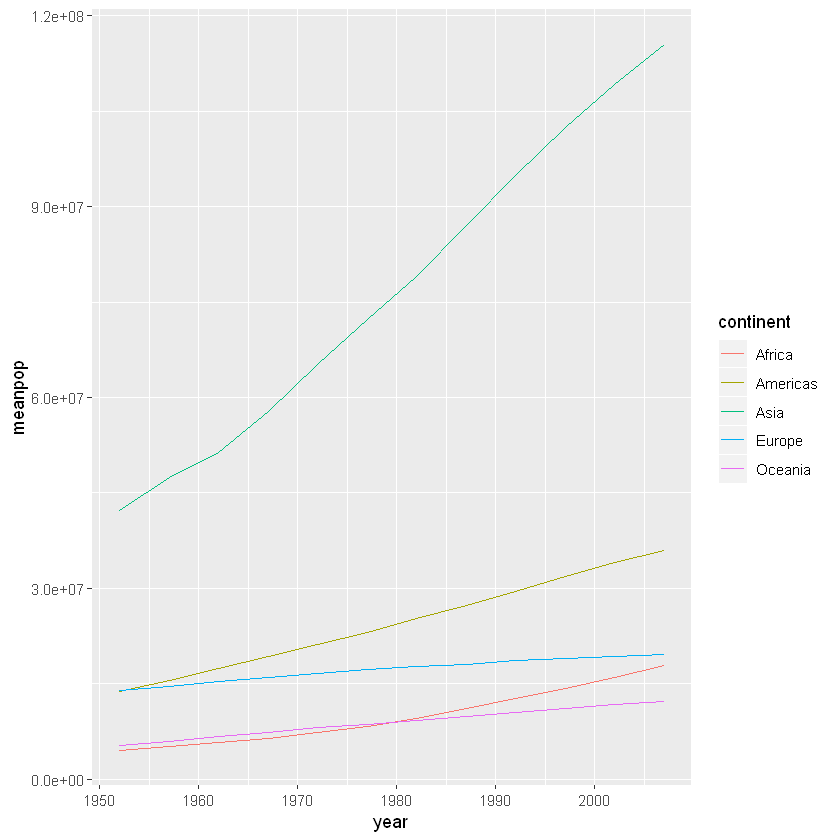

In [11]:
# First we prepare our data 

by_year_continent = gapminder %>%
group_by(year, continent) %>%
summarise(meanpop = mean(pop))

# Then we plot! Which continent has seen the steapest increase in population size?

by_year_continent %>% 
ggplot(aes(x= year, y = meanpop, color = continent)) + geom_line()


# Can you do the same for life expectancy? What did you see?


## We will now focus on the Asian continent to understand the previous result better

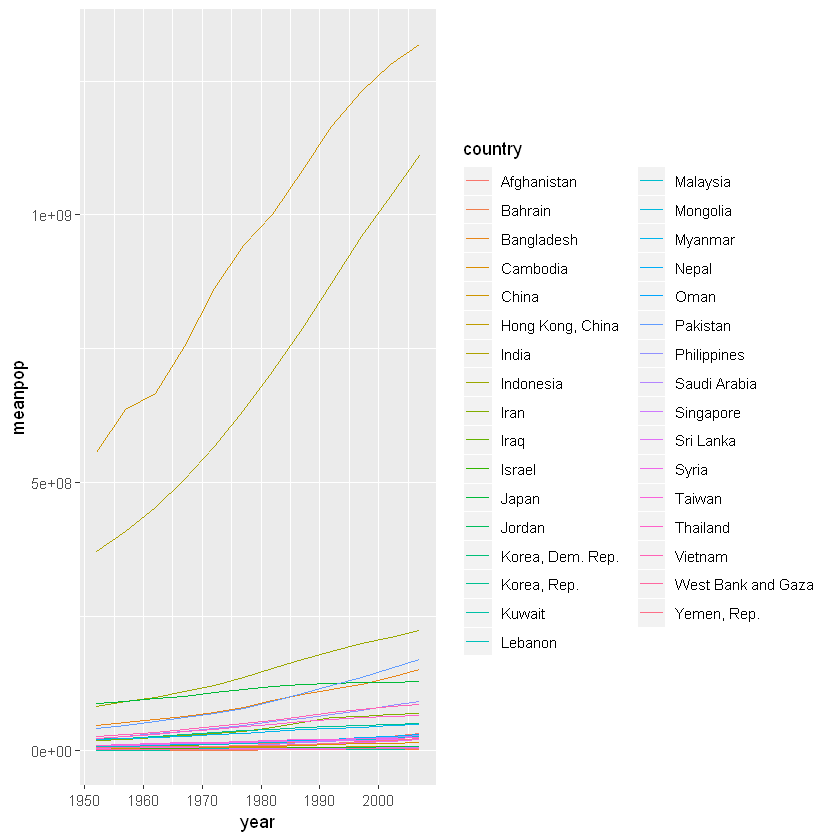

In [13]:
# Here we use a filter to only keep data from the Asian continent

gap_asia =  gapminder %>%
  filter(continent == 'Asia') %>%
  group_by(year, country) %>%
  summarise(meanpop = mean(pop))


# We will now make a plot to look at pop size in the Asian countries

asia_plot = gap_asia %>%
ggplot(aes(x = year, y = meanpop, color = country)) + geom_line() 


asia_plot

# We can use a logarithmic tranformation to visualise our data better - Can you propose a trasformation


## Color pallettes

Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
"Warning message:
"Removed 300 rows containing missing values (geom_path)."

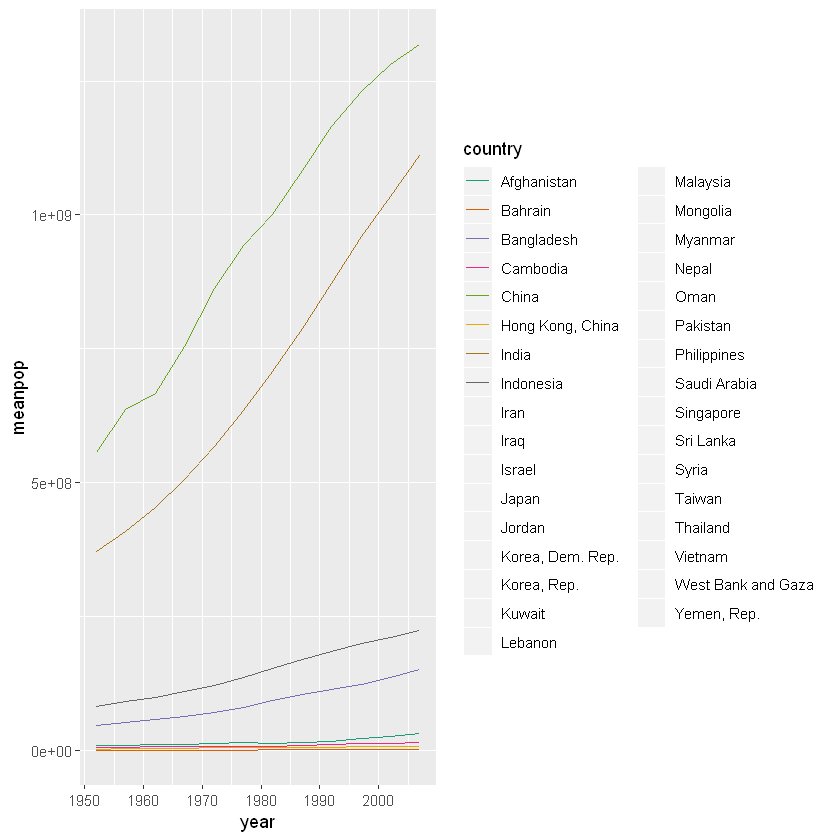

In [15]:
# First, let's install a package that contains numerous palletes for R
library(RColorBrewer)

asia_plot + scale_color_brewer(palette="Dark2")

## A bonus plot for the road - Looking for relationships in data

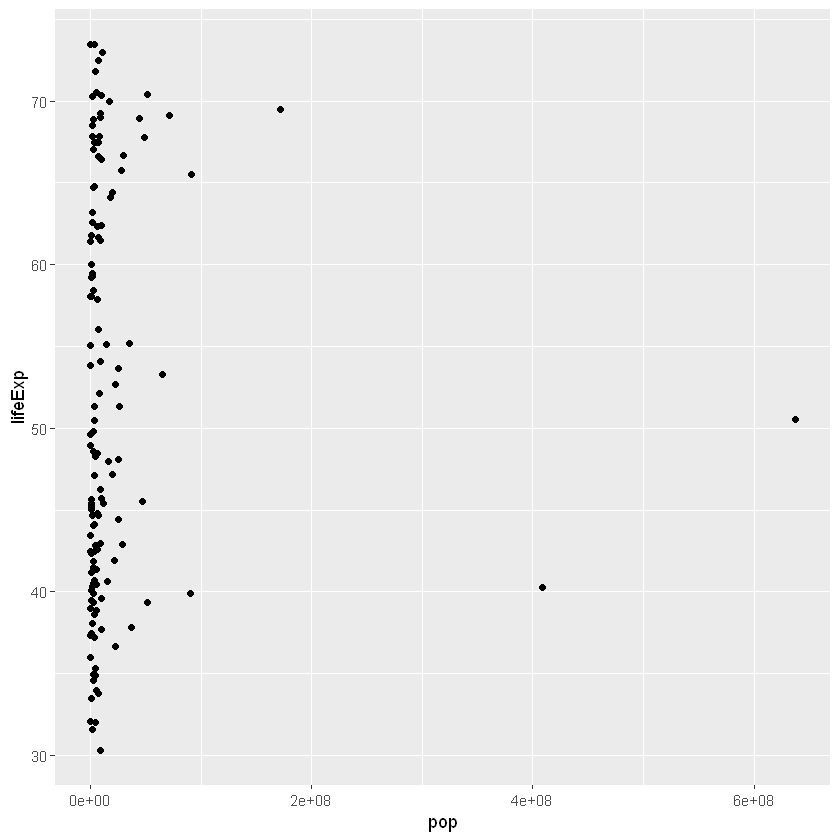

In [16]:
# Let's focus now once again on year 1957

gapminder_1957 = gapminder %>%
  filter(year == 1957)

# Is there a relationship between population size and lide expectancy
gapminder_1957 %>%
ggplot(aes(x = pop, y = lifeExp)) +  geom_point() 

# If this plot was in a Notebook, what would you want to customize? Discuss with your group and we will try it in class.

# Congratulations on completing this workshop!

<img src="https://i.imgflip.com/22dl7c.jpg" width="600">